# Final Capstone 

Time Series Analysis With Facebook Prophet

Siemens Gamesa Renewable Energy

Vestas Wind Systems

In this project I will analyze the market capitalization behavior over time of two leading companies in the renewable energy market: Siemens-Gamesa Renewable and Vestas Wind Systems.

For this analysis I will use the Prophet library and we will forecast the market capitalization of both companies and compare them.

In [ ]:
# Import all the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import fbprophet
%matplotlib inline

plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Exploratory Data Analysis

In [ ]:
# Bring the data into two different dataframes for each company:
siemens = pd.read_csv('GCTAY.csv')
vestas = pd.read_csv('VWDRY.csv')

In [ ]:
# Explore the first rows of Siemens
siemens.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,1.90,1.90,1.90,1.90,1.553916,0
1,2015-01-05,1.77,1.78,1.72,1.72,1.406703,300
2,2015-01-06,1.72,1.72,1.72,1.72,1.406703,0


In [ ]:
# Explore the first rows of Vestas
vestas.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,12.83,12.93,12.80,12.87,11.729939,49400
1,2015-01-05,12.80,12.83,12.55,12.59,11.474741,17600
2,2015-01-06,12.52,13.26,12.51,13.12,11.957793,25300


In [ ]:
# Explore the data type of each column in Siemens df:
siemens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1486 non-null   object 
 1   Open       1486 non-null   float64
 2   High       1486 non-null   float64
 3   Low        1486 non-null   float64
 4   Close      1486 non-null   float64
 5   Adj Close  1486 non-null   float64
 6   Volume     1486 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.4+ KB


In [ ]:
# Explore the data type of each column in Vestas df:
vestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1486 non-null   object 
 1   Open       1486 non-null   float64
 2   High       1486 non-null   float64
 3   Low        1486 non-null   float64
 4   Close      1486 non-null   float64
 5   Adj Close  1486 non-null   float64
 6   Volume     1486 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.4+ KB


In [ ]:
# Explore missingnes in the Siemens data:
print('Missing values in Siemens data: ', siemens.isna().sum())

Missing values in Siemens data:  Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Explore missingnes in the Vestas data:
print('Missing values in Vestas data: ', vestas.isna().sum())

Missing values in Vestas data:  Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Convert the Date column in each df into a datetime object:
siemens['Date'] = pd.to_datetime(siemens['Date'])
vestas['Date'] = pd.to_datetime(vestas['Date'])

siemens.set_index(siemens['Date'], inplace=True)
vestas.set_index(vestas['Date'], inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



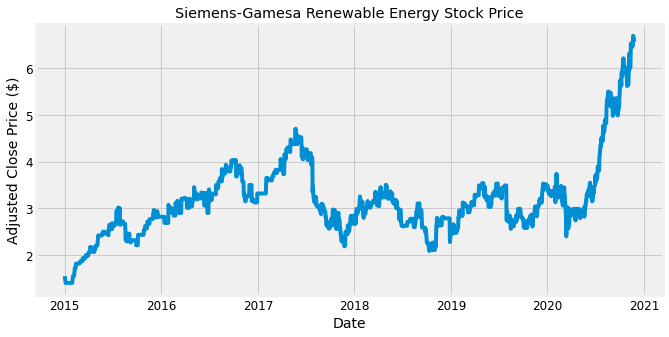

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



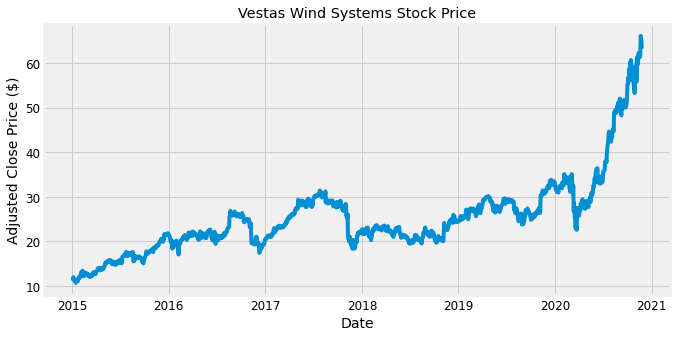

In [ ]:
# Plot the Adjusted Close Price for each company:
plt.figure(figsize=(10,5))
sns.lineplot(siemens.index, siemens['Adj Close'])
plt.title('Siemens-Gamesa Renewable Energy Stock Price')
plt.ylabel('Adjusted Close Price ($)')
plt.savefig('Siemens Stock Price')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(vestas.index, vestas['Adj Close'])
plt.title('Vestas Wind Systems Stock Price')
plt.ylabel('Adjusted Close Price ($)')
plt.show()

Market Capitalization Calculations

In [ ]:
# Create new dataframes with the average number of shares oustanding each year for each company:
siemens_shares = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019, 2020], 'Shares': [1.381e9, 1.385e9, 1.70e9, 3.406e9, 3.398e9, 3.398e9]})
vestas_shares = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019, 2020], 'Shares': [660.67e6, 666.67e6, 633.48e6, 605e6, 591e6, 588e6]})

In [ ]:
# Create a new column with the market capitalization calculation:
siemens['Year'] = siemens.index.year
siemens = pd.merge(siemens, siemens_shares,how='left', on='Year')
siemens['Market Cap Siemens'] = siemens['Adj Close'] * siemens['Shares']

vestas['Year'] = vestas.index.year
vestas = pd.merge(vestas, vestas_shares,how='left', on='Year')
vestas['Market Cap Vestas'] = vestas['Adj Close'] * vestas['Shares']

In [ ]:
# Merge the two dataframes and rename columns:
combo = siemens.merge(vestas, how='inner', on='Date')
combo = combo[['Date', 'Market Cap Siemens', 'Market Cap Vestas']]
combo['Market Cap Siemens'] = combo['Market Cap Siemens'] / 1e9
combo['Market Cap Vestas'] = combo['Market Cap Vestas'] / 1e9
combo.head()

,Date,Market Cap Siemens,Market Cap Vestas
0,2015-01-02,2.145958,7.749619
1,2015-01-05,1.942657,7.581017
2,2015-01-06,1.942657,7.900155
3,2015-01-07,1.942657,7.605103
4,2015-01-08,1.942657,7.556931


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



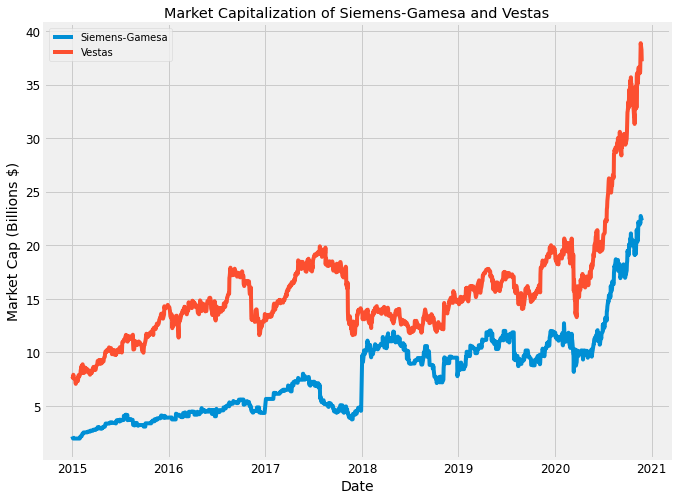

In [ ]:
# Plot the resulting dataframe with the market capitalization of the two companies:
plt.figure(figsize=(10, 8))
sns.lineplot(combo['Date'], combo['Market Cap Siemens'], label='Siemens-Gamesa')
sns.lineplot(combo['Date'], combo['Market Cap Vestas'], label='Vestas')
plt.xlabel('Date')
plt.ylabel('Market Cap (Billions $)')
plt.title('Market Capitalization of Siemens-Gamesa and Vestas')
plt.legend()
plt.savefig('Market Cap Combo')
plt.show()

# Modeling the data with Prophet

Fitting the data into a model:

In [ ]:
# We only need two columns: Date and y, put market cap in billions
vestas = vestas[['Date', 'Market Cap Vestas']]
vestas.columns = ['ds', 'y']
vestas['y'] = vestas['y'] / 1e9

siemens = siemens[['Date', 'Market Cap Siemens']]
siemens.columns = ['ds', 'y']
siemens['y'] = siemens['y'] / 1e9

In [ ]:
# Fit the Prohet Model into the data:
vestas_model = fbprophet.Prophet(changepoint_prior_scale=0.05)
vestas_model.fit(vestas)

siemens_model = fbprophet.Prophet(changepoint_prior_scale=0.05)
siemens_model.fit(siemens)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Effects of Changepoint Prior Scale

In [ ]:
# Model with 4 different changepoints:
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(vestas)

    future = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future)

    vestas[changepoint] = future['yhat']

Text(0.5, 1.0, 'Effect of Changepoint Prior Scale')

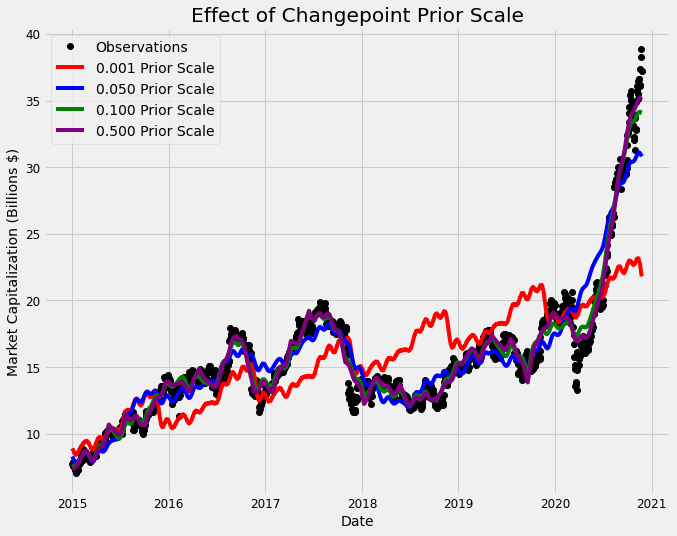

In [ ]:
# Plot for each of the changepoints:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.figure(figsize=(10,8))
plt.plot(vestas['ds'], vestas['y'], 'ko', label='Observations')
colors = {0.001: 'r', 0.05: 'b', 0.1: 'green', 0.5: 'purple'}

for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(vestas['ds'], vestas[changepoint], color = colors[changepoint], label = '%.3f Prior Scale' % changepoint)

plt.legend(prop={'size': 14})    
plt.xlabel('Date')
plt.ylabel('Market Capitalization (Billions $)')
plt.title('Effect of Changepoint Prior Scale')


For this example I will use 0.05 for the effect of Changepoints Prior Scale. This will allow us to find the right balance of fitting the training data and being able to generalize to new data

Predictions

In [ ]:
# Make a future datafram for 2 years and make predictions:
vestas_forecast = vestas_model.make_future_dataframe(periods=365 * 2, freq='D')
vestas_forecast = vestas_model.predict(vestas_forecast)

siemens_forecast = siemens_model.make_future_dataframe(periods=365 * 2, freq='D')
siemens_forecast = siemens_model.predict(siemens_forecast)

Text(0.5, 1.0, 'Market Capitalization of Vestas Wind Systems')

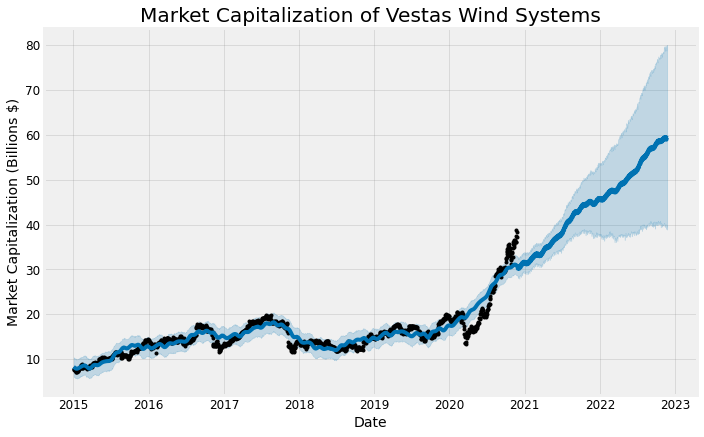

In [ ]:
# Plot the predictions for each company:
vestas_model.plot(vestas_forecast, xlabel = 'Date', ylabel = 'Market Capitalization (Billions $)')
plt.title('Market Capitalization of Vestas Wind Systems')

Text(0.5, 1.0, 'Market Capitalization of Siemens-Gamesa')

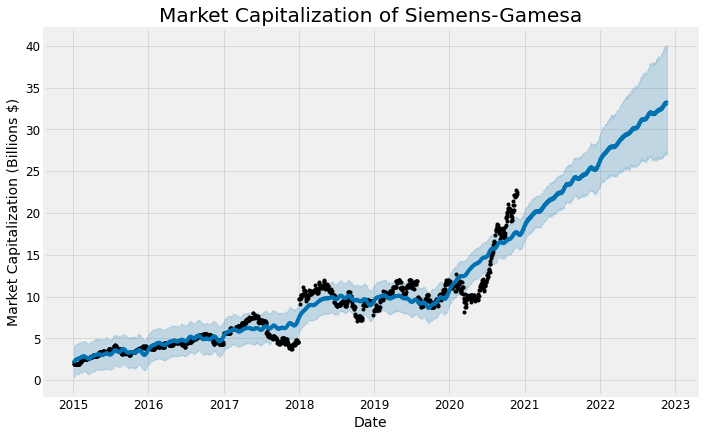

In [ ]:
siemens_model.plot(siemens_forecast, xlabel = 'Date', ylabel = 'Market Capitalization (Billions $)')
plt.title('Market Capitalization of Siemens-Gamesa')

Changepoints represent when the time series growth rate significantly changes, we can check for the changepoints in each time series in our models:

In [ ]:
vestas_model.changepoints[:10]

47    2015-03-12
95    2015-05-20
142   2015-07-28
190   2015-10-05
237   2015-12-10
285   2016-02-22
332   2016-04-28
380   2016-07-07
427   2016-09-13
475   2016-11-18
Name: ds, dtype: datetime64[ns]

In [ ]:
siemens_model.changepoints[:10]

47    2015-03-12
95    2015-05-20
142   2015-07-28
190   2015-10-05
237   2015-12-10
285   2016-02-22
332   2016-04-28
380   2016-07-07
427   2016-09-13
475   2016-11-18
Name: ds, dtype: datetime64[ns]

Compare Forecasts

In [ ]:
vestas_names = ['vestas_%s' % column for column in vestas_forecast.columns]
siemens_names = ['siemens_%s' % column for column in siemens_forecast.columns]

# Create a copy of the dataframes to merge:
merge_vestas_forecast = vestas_forecast.copy()
merge_siemens_forecast = siemens_forecast.copy()

# Rename the columns:
merge_vestas_forecast.columns = vestas_names
merge_siemens_forecast.columns = siemens_names

In [ ]:
# Merge the two datasets:
forecast = pd.merge(merge_siemens_forecast, merge_vestas_forecast, how = 'inner', left_on= 'siemens_ds', right_on = 'vestas_ds')

#Rename date column:
forecast = forecast.rename(columns={'siemens_ds': 'Date'}).drop('vestas_ds', axis=1)
forecast.head()

,Date,siemens_trend,siemens_yhat_lower,siemens_yhat_upper,siemens_trend_lower,siemens_trend_upper,siemens_additive_terms,siemens_additive_terms_lower,siemens_additive_terms_upper,siemens_weekly,siemens_weekly_lower,siemens_weekly_upper,siemens_yearly,siemens_yearly_lower,siemens_yearly_upper,siemens_multiplicative_terms,siemens_multiplicative_terms_lower,siemens_multiplicative_terms_upper,siemens_yhat,vestas_trend,vestas_yhat_lower,vestas_yhat_upper,vestas_trend_lower,vestas_trend_upper,vestas_additive_terms,vestas_additive_terms_lower,vestas_additive_terms_upper,vestas_weekly,vestas_weekly_lower,vestas_weekly_upper,vestas_yearly,vestas_yearly_lower,vestas_yearly_upper,vestas_multiplicative_terms,vestas_multiplicative_terms_lower,vestas_multiplicative_terms_upper,vestas_yhat
0,2015-01-02,2.288250,0.187329,3.857745,2.288250,2.288250,-0.220826,-0.220826,-0.220826,0.005481,0.005481,0.005481,-0.226307,-0.226307,-0.226307,0.0,0.0,0.0,2.067424,8.372288,6.144364,10.474085,8.372288,8.372288,-0.074017,-0.074017,-0.074017,0.133723,0.133723,0.133723,-0.207741,-0.207741,-0.207741,0.0,0.0,0.0,8.298271
1,2015-01-05,2.301555,0.462631,4.048772,2.301555,2.301555,-0.086971,-0.086971,-0.086971,0.035501,0.035501,0.035501,-0.122471,-0.122471,-0.122471,0.0,0.0,0.0,2.214585,8.403968,5.989486,10.200403,8.403968,8.403968,-0.227137,-0.227137,-0.227137,0.141915,0.141915,0.141915,-0.369052,-0.369052,-0.369052,0.0,0.0,0.0,8.176831
2,2015-01-06,2.305990,0.530934,4.111460,2.305990,2.305990,-0.050546,-0.050546,-0.050546,0.040990,0.040990,0.040990,-0.091536,-0.091536,-0.091536,0.0,0.0,0.0,2.255444,8.414528,6.085863,10.314645,8.414528,8.414528,-0.289913,-0.289913,-0.289913,0.133075,0.133075,0.133075,-0.422987,-0.422987,-0.422987,0.0,0.0,0.0,8.124615
3,2015-01-07,2.310426,0.467484,4.310327,2.310426,2.310426,-0.023677,-0.023677,-0.023677,0.038972,0.038972,0.038972,-0.062648,-0.062648,-0.062648,0.0,0.0,0.0,2.286749,8.425088,6.021967,10.289789,8.425088,8.425088,-0.337541,-0.337541,-0.337541,0.138075,0.138075,0.138075,-0.475616,-0.475616,-0.475616,0.0,0.0,0.0,8.087547
4,2015-01-08,2.314861,0.444514,4.124399,2.314861,2.314861,-0.006602,-0.006602,-0.006602,0.029284,0.029284,0.029284,-0.035886,-0.035886,-0.035886,0.0,0.0,0.0,2.308258,8.435648,5.880768,10.098841,8.435648,8.435648,-0.379945,-0.379945,-0.379945,0.146233,0.146233,0.146233,-0.526177,-0.526177,-0.526177,0.0,0.0,0.0,8.055703


Text(0.5, 1.0, 'Siemens-Gamesa vs. Vestas Trend')

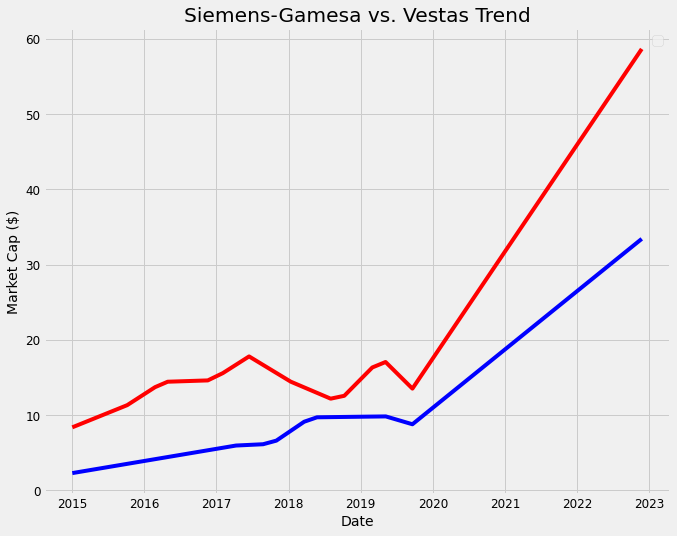

In [ ]:
# Visualize only the trend and the forecast:
plt.figure(figsize=(10,8))
plt.plot(forecast['Date'], forecast['siemens_trend'], 'b')
plt.plot(forecast['Date'], forecast['vestas_trend'], 'r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap ($)')
plt.title('Siemens-Gamesa vs. Vestas Trend')

Text(0.5, 1.0, 'Siemens-Gamesa vs. Vestas Estimate')

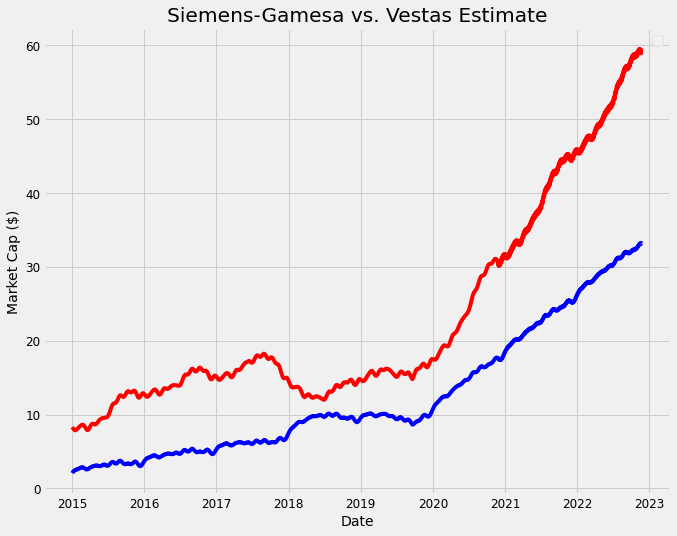

In [ ]:
# Plot the estiamte 
plt.figure(figsize=(10,8))
plt.plot(forecast['Date'], forecast['siemens_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['vestas_yhat'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap ($)')
plt.title('Siemens-Gamesa vs. Vestas Estimate')

Plotting the estimate allow us to smooth out the noise in our data. The level of smoothness depends on changepoint prior scale.

Forecast With Uncertainty Bounds

Text(0.5, 1.0, 'Market Capitalization of Siemens-Gamesa and Vestas Wind Systems')

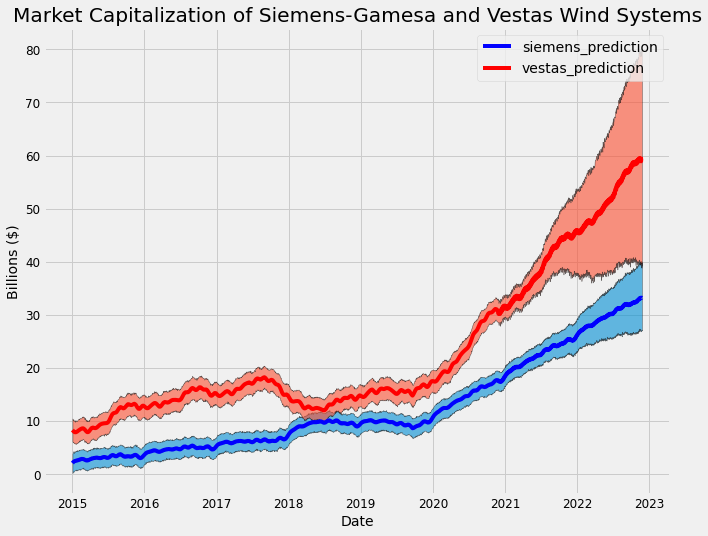

In [ ]:
# Create the subplots:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

# Plot the estimate:
ax.plot(forecast['Date'], forecast['siemens_yhat'], 'b', label = 'siemens_prediction') 
ax.plot(forecast['Date'], forecast['vestas_yhat'], 'r', label = 'vestas_prediction') 

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['siemens_yhat_upper'], forecast['siemens_yhat_lower'], alpha = 0.6, edgecolor = 'k')
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['vestas_yhat_upper'], forecast['vestas_yhat_lower'], alpha = 0.6, edgecolor = 'k')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Billions ($)')
plt.title('Market Capitalization of Siemens-Gamesa and Vestas Wind Systems')

By creating this plot with uncertainty bounds we can see that the uncertainty increases over time, as expected. The value of both companies is expected to keep increasing, Vestas is expected to increase at a faster rate than Siemens.

Trends and Patterns

In [ ]:
siemens_model.plot_components(siemens_forecast)

In [ ]:
vestas_model.plot_components(vestas_forecast)

When analyzing these graphs we can clearly see that both Siemens and Vestas value are expected to keep growing over time.

# Conslusions

Thanks to the additive models that we used we can very simply represent a time-series as a combination of patterns at different scales such as daily, weekly, seasonally, and yearly, along with an overall trend.

We analyzed a very simple forecast for the market capitalization of two companies and create different plots with the forecasts along with uncertainty bounds. Facebook's Prophet library is a library with impressive capabilities.



Recommendations and warnings:



*   Past performance is no indicator of future performance
*   The trends clearly show an increase in the values of both companies based entirely on data from the past.
* Further analysis using other methods, such as LSTM, might provide other insights in this data.
* Stock predictions comes with much uncertainty because of the great number of variables that come into play, before making an investment decision the risks should be clear for everyone.

